1.95729907342253e-6*log(1.0*exp(8.7505538149876e+17*L*d*(1.602176634e-19*Phi_g + 1.54018197992134e-38)/(0.00354167512512*L*d + 9.916690350336e-11*d**2/L) + 3.92558119994115e-9*Phi_d*d**2/(L*(0.00354167512512*L*d + 9.916690350336e-11*d**2/L))) + 1.0) - 1.95729907342253e-6*log(1.0*exp(8.7505538149876e+17*L*d*(1.602176634e-19*Phi_g + 1.54018197992134e-38)/(0.00354167512512*L*d + 9.916690350336e-11*d**2/L) - 39.5855982314518*Phi_d + 3.92558119994115e-9*Phi_d*d**2/(L*(0.00354167512512*L*d + 9.916690350336e-11*d**2/L))) + 1.0) - 1.95729907342253e-6*log(exp(197927991157259*Phi_d/5000000000000))


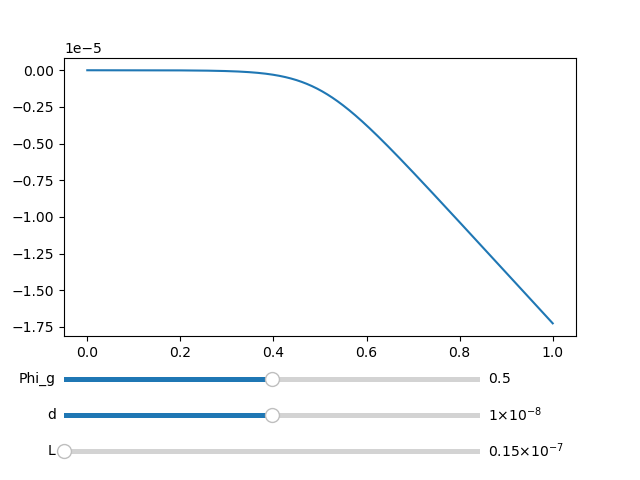

In [1]:
import numpy as np
import sympy as sym
from sympy import exp, oo, lambdify
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib widget
# constants
e = 1.602176634*10**(-19)   # C
h = 6.6260755*10**(-34)     # J*s
kB = 1.380649*10**(-23)     # J/K
T = 293.15                  # K

epsilon_0 = 8.8541878128*10**(-12)  # As/(Vm)
epsilon_ox = 4
epsilon_Si = 11.2

d = sym.Symbol('d')
#d = 10*10**(-9)         # m
d_ox = 10*10**(-9)      # m
L = sym.Symbol('L')
#L = 15*10**(-9)         # m


C_ox = epsilon_0*epsilon_ox*d*L/d_ox    # C
C_d = epsilon_0*epsilon_Si*d**2/L       # C

Phi_bi = 0.6*e          # J
Phi_g = sym.Symbol('Phi_g') 
Phi_d = sym.Symbol('Phi_d') 
Phi_f_0 = C_ox/(C_ox+C_d)*(Phi_g*e+Phi_bi*e)+C_d/(C_ox+C_d)*Phi_d*e # J

EFd = Phi_d*e # J
EFs = 0 # J
E = sym.Symbol('E')

function = 1/(1+exp((E-EFs)/(kB*T)))-1/(1+exp((E-EFd)/(kB*T)))
I = 2*e/h*sym.integrate(function,(E,Phi_f_0,oo))
print(I)

f = lambdify([Phi_d,Phi_g,d,L],I)

# Plotting
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.3)

x = np.linspace(0, 1, 1000)
Phi_g_val = 0.5  # Initial value for Phi_g
d_val = 10*10**(-9) # Initial value for d
L_val = 15*10**(-9)         # m
ax.plot(x, f(x, Phi_g_val,d_val,L_val), label=f'{Phi_g_val} V')

# Slider
axcolor = 'lightgoldenrodyellow'
axPhi_g = plt.axes([0.1, 0.2, 0.65, 0.02], facecolor=axcolor)
sPhi_g = Slider(axPhi_g, 'Phi_g', 0, 1, valinit=Phi_g_val)
axd = plt.axes([0.1, 0.125, 0.65, 0.02], facecolor=axcolor)
sd = Slider(axd, 'd', 0, 20*10**(-9), valinit=d_val)
axL = plt.axes([0.1, 0.05, 0.65, 0.02], facecolor=axcolor)
sL = Slider(axL, 'L', 15*10**(-9), 100*10**(-9), valinit=L_val)

# Update function
def update(val):
    ax.clear()
    ax.plot(x, f(x, sPhi_g.val,sd.val,sL.val), label=f'{sPhi_g.val:.2f} V')
    ax.legend()

# Slider event
sPhi_g.on_changed(update)
sd.on_changed(update)
sL.on_changed(update)

plt.show()